This mini task is based on DL lecture homework by prof. KyungHyun Cho, NYU.  
Changes based on the book 3-min-pytorch.

---

# CSCI-UA 0473 - Introduction to Machine Learning

### HW 2 - Programming Assignment

#### Instructions

For this programming assignment, an image (vector) was chosen and was passed through a weird function to obtain something mysterious (vector). You are given the mysterious vector and the weird function used to transform the original image.

AND, YOUR TASK IS TO FIND THE ORIGINAL IMAGE.

Hint: You will find Autograd helpful.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from autograd import numpy
from autograd import grad

from scipy import optimize

## 1. Given

In [2]:
# The mysterious vector

import pickle    # Library used to save and load values of variables (Technically, it's called Serialization)

shp_original_img = (100, 100)  # Shape of the original image
mysterious_image = pickle.load(open('broken_image_t.p', 'rb'))

In [3]:
# The weird function which transformed the original image

def weird_function(x, n_iter=5):
    h = x    
    filt = numpy.array([-1./3, 1./3, -1./3])
    
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0 * 0])
        h_l = torch.cat((zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor),0)
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        
        if i%2 == 0:
            h = torch.cat([h[h.shape[0]//2:],h[:h.shape[0]//2]],0)
            
    return h

## 2. Your Solution

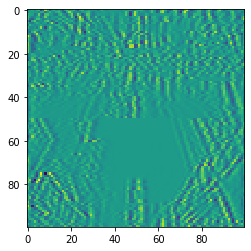

In [4]:
import torch

mysterious_image = torch.FloatTensor(mysterious_image)
plt.imshow(mysterious_image.view(100,100))

### Define distance_loss(hypo, mys_image)

get loss (in this we use distance provided in pytorch) between hypothesis (out rand_tensor) and mysterious image.

In [5]:
def distance_loss(hypo, mys_image):
    return torch.dist(hypo,mys_image)

### Create random tensor used for gradient update

In [6]:
rand_tensor = torch.randn(mysterious_image.size())

In [7]:
rand_tensor

tensor([-1.2804,  2.0416,  0.1633,  ...,  1.0667,  0.9667,  0.2033])

### Gradient Descent and Update

In [11]:
lr = 0.8
epochs = 20000

In [12]:
for i in range(epochs):
    rand_tensor.requires_grad_(True)
    hypo = weird_function(rand_tensor)
    loss = distance_loss(hypo, mysterious_image)
    loss.backward() # loss를 rand_tensor로 미분
    
    with torch.no_grad(): # 파이토치의 자동 기울기 계산을 비활성화. 즉 requires_grad = FALSE로 잠시 만들어줌
        rand_tensor = rand_tensor - lr*rand_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 0.0840989276766777
Loss at 1000 = 0.06841310858726501
Loss at 2000 = 0.053215328603982925
Loss at 3000 = 0.03840332105755806
Loss at 4000 = 0.02390795201063156
Loss at 5000 = 0.021161502227187157
Loss at 6000 = 0.02116682566702366
Loss at 7000 = 0.021167650818824768
Loss at 8000 = 0.02116844616830349
Loss at 9000 = 0.02116885408759117
Loss at 10000 = 0.021170109510421753
Loss at 11000 = 0.02116614393889904
Loss at 12000 = 0.021169720217585564
Loss at 13000 = 0.02116519585251808
Loss at 14000 = 0.02115958370268345
Loss at 15000 = 0.021159818395972252
Loss at 16000 = 0.02115689590573311
Loss at 17000 = 0.02115722931921482
Loss at 18000 = 0.021156754344701767
Loss at 19000 = 0.021151673048734665


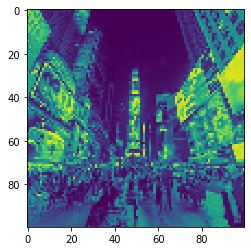

In [13]:
plt.imshow(rand_tensor.view(100,100).data)

with torch.no_grad() : 코드 블록을 이로 랩핑하여 autograd가 텐서의 추적 기록을 남지 않도록 하는 것이다.